# Basic setup

## Import packages and basic settings

In [33]:
# Autoreload ligado.py, see https://stackoverflow.com/a/9179917
%load_ext autoreload
%autoreload 2

import os
# Get running notebook path, works both in JupyterLab and PyCharm: https://stackoverflow.com/a/53958599/94289
notebook_path = globals()['_dh'][0]
# Go to parent directory of notebook path, needed for JupyterLab to import ligado module
os.chdir(os.path.dirname(notebook_path))
print(os.getcwd())

from ligado import setup, reader, aggregator, plot, alert, config as cfg
from ligado.constants import *
import numpy as np
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\aimfe\Projects\Python\kpi-time-series


In [34]:
# Configuration
cfg.paths.project_dir = os.path.basename(os.path.normpath(notebook_path))  # https://stackoverflow.com/a/3925147/94289
cfg.data.source = DataSource.CSV
cfg.data.ligado_survey_id = 200
cfg.kpi.likert_min = 1
cfg.kpi.likert_max = 10
cfg.kpi.neg_polarity = ['emotional_exhaustion']
cfg.nodes.root = 1
cfg.nodes.selected = [1, 100, 200, 300]
cfg.alert.base_url = 'https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2.platformsh.site'

In [35]:
# Set project directory as current working directory
os.chdir(notebook_path)
print(os.getcwd())

setup.init_display()

C:\Users\aimfe\Projects\Python\kpi-time-series\ligado-demo


## Data import

### KPI data

In [36]:
df_kpis = reader.get_df_kpis() 
df_kpis

,kpiID,name,label,min,max,polarity
name,,,,,,
task,102000,task,Task,1,10,1
equipment,102002,equipment,Equipment,1,10,1
team,102005,team,Team,1,10,1
team_at_customer,102007,team_at_customer,Team at customer,1,10,1
direct_superior,102009,direct_superior,Direct Superior,1,10,1
management,102012,management,Management,1,10,1
work_pressure,102016,work_pressure,Work pressure,1,10,1
processes,102018,processes,Processes,1,10,1
cooperation,102019,cooperation,Cooperation,1,10,1


In [37]:
df_kpi_values = reader.get_df_kpi_values() 
df_kpi_values.head(3)

,meanID,userSurveyID,value,answers,dateStart,itemsetID,kpiName,isDeleted,sex,birthDate,entryDate,age,employment,orgNodeID,orgNodeLabel,orgNodeShortLabel,orgNodeLeft,orgNodeRight,orgNodeLevel
dateCompleted,,,,,,,,,,,,,,,,,,,
2019-12-01,48,10,8.0,1,2019-12-01,102009,direct_superior,0,m,1960-02-09,2019-01-26,59,0,100,Switzerland,Switzerland,2,3,2
2019-12-01,49,10,6.0,2,2019-12-01,102020,personal_development,0,m,1960-02-09,2019-01-26,59,0,100,Switzerland,Switzerland,2,3,2
2019-12-01,50,10,3.0,1,2019-12-01,102022,communication,0,m,1960-02-09,2019-01-26,59,0,100,Switzerland,Switzerland,2,3,2


### Organigram data

In [38]:
df_org_nodes = reader.get_df_org_nodes() 
df_org_nodes.head(3)

,nodeID,parentNodeID,label,shortLabel,left,right,level,validFrom,validUntil,users,activeUsers
nodeID,,,,,,,,,,,
1,1,NaN,Demo Company,Demo Company,1,8,1,NaN,NaN,120,120
100,100,1.0,Switzerland,Switzerland,2,3,2,NaN,NaN,60,60
200,200,1.0,Germany,Germany,4,5,2,NaN,NaN,30,30


### Participation data

In [39]:
df_participants = reader.get_df_participants() 
df_participants.head(3)

,isDeleted,completeSurveys,incompleteSurveys,completePercent
importKey,,,,
101,0,18.0,3.0,86.0
102,0,14.0,6.0,70.0
103,0,17.0,4.0,81.0


In [40]:
df_surveys = reader.get_df_surveys() 
df_surveys.head(3)

,userID,userIsDeleted,dateStart,dateCompleted,isComplete,mobileConnectionCount,orgNodeID,orgNodeLeft,orgNodeRight
userSurveyID,,,,,,,,,
1,1050,0,2019-12-01,2019-12-01,1,0,100,2,3
2,1089,0,2019-12-01,NaT,0,0,200,4,5
3,1076,0,2019-12-01,2019-12-01,1,0,200,4,5


In [41]:
df_users = reader.get_df_users() 
df_users.head(3)

,isDeleted,mobileConnectionCount
userID,,
1001,0,0
1002,0,0
1003,0,0


# Basic settings and org unit selection for analysis

In [42]:
root_node = df_org_nodes.loc[cfg.nodes.root]

# Some analyses are run for several org_nodes, select them here
org_nodes = df_org_nodes.loc[cfg.nodes.selected]

# Select KPIs to use in analyses
kpis = df_kpis.loc[['satisfaction', 'commitment', 'emotional_exhaustion', 
               'rewards', 'personal_development', 'direct_superior', 'communication']]

# KPI benchmarks

## Measured benchmark

In [43]:
df_benchmarks_init = kpis.copy()
aggregated = df_kpi_values.groupby('kpiName')['value'].agg(['mean', 'std', 'count']).round(2)
df_benchmarks_init = df_benchmarks_init.join(aggregated)
df_benchmarks_init['comment'] = 'Measured'
display(df_benchmarks_init.drop('name', 1))

,kpiID,label,min,max,polarity,mean,std,count,comment
name,,,,,,,,,
satisfaction,102031,Satisfaction,1,10,1,5.31,2.78,1626,Measured
commitment,102033,Commitment,1,10,1,5.46,2.85,1632,Measured
emotional_exhaustion,102035,Emotional Exhaustion,1,10,-1,5.61,2.75,1611,Measured
rewards,102024,Rewards,1,10,1,5.80,2.83,1622,Measured
personal_development,102020,Personal development,1,10,1,5.59,2.82,1652,Measured
direct_superior,102009,Direct Superior,1,10,1,5.51,2.82,1627,Measured
communication,102022,Communication,1,10,1,5.18,2.77,1606,Measured


## Dummy benchmark

A fixed dummy benchmark is created, instead of using the measured benchmark.

In [44]:
df_benchmarks_dummy = df_benchmarks_init.copy()

df_benchmarks_dummy.loc[:, 'mean'] = 5.50
df_benchmarks_dummy.loc[:, 'std'] = 2.00
df_benchmarks_dummy.loc[:, 'comment'] = 'Dummy'

# Corrections to make KPIs go into the yellow and red zone.
df_benchmarks_dummy.loc[['satisfaction', 'commitment', 'direct_superior'], 'mean'] = 6.00

display(df_benchmarks_dummy.drop('name', 1))

,kpiID,label,min,max,polarity,mean,std,count,comment
name,,,,,,,,,
satisfaction,102031,Satisfaction,1,10,1,6.0,2.0,1626,Dummy
commitment,102033,Commitment,1,10,1,6.0,2.0,1632,Dummy
emotional_exhaustion,102035,Emotional Exhaustion,1,10,-1,5.5,2.0,1611,Dummy
rewards,102024,Rewards,1,10,1,5.5,2.0,1622,Dummy
personal_development,102020,Personal development,1,10,1,5.5,2.0,1652,Dummy
direct_superior,102009,Direct Superior,1,10,1,6.0,2.0,1627,Dummy
communication,102022,Communication,1,10,1,5.5,2.0,1606,Dummy


## Selected benchmarks for analysis

In [45]:
df_benchmarks = df_benchmarks_dummy 

# KPI aggregation

## Aggregation within surveys

A Ligado survey contains only a few randomly selected items, which may or may not belong to the same KPI. The most basic aggregation within surveys is done right after the survey is finished and stored in the `itemset_means` DB table. 

The `answers` column corresponds to the `itemValueCount` column in the DB and contains the number of items answered for the KPI given by `kpiName`. These answers are averaged to calculate the mean KPI `value`.

In [46]:
df_kpi_node = aggregator.filter_by_org_node(df_kpi_values, root_node)
display(df_kpi_node.loc[:, ['meanID', 'userSurveyID', 'kpiName', 'value', 'answers']].head(3))

,meanID,userSurveyID,kpiName,value,answers
dateCompleted,,,,,
2019-12-01,48,10,direct_superior,8.0,1
2019-12-01,49,10,personal_development,6.0,2
2019-12-01,50,10,communication,3.0,1


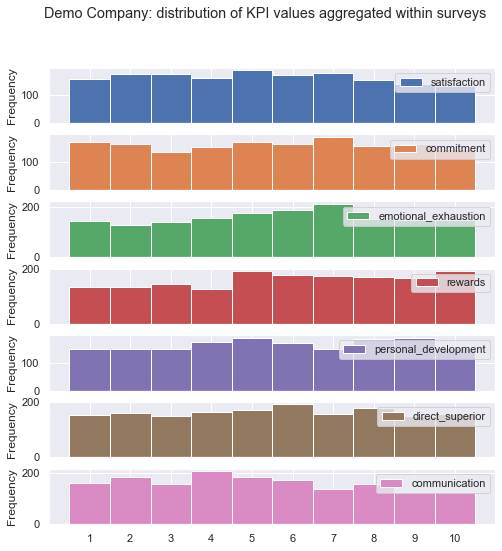

In [47]:
plot.plot_answers_surveys(df_kpi_node, root_node, kpis)

# Participation analysis

In [48]:
num_participants = len(df_participants.index)
df_participants_once = df_participants.loc[df_participants.completeSurveys > 0, :]
num_participants_once = len(df_participants_once.index)
percent_participants_once = np.round(num_participants_once / num_participants * 100, 1)

print('Number of participants: {}'.format(num_participants))
print('Number of participants with one or more completed ligado surveys: {}'.format(num_participants_once))
print('Participation rate: {}%'.format(percent_participants_once))

Number of participants: 120
Number of participants with one or more completed ligado surveys: 120
Participation rate: 100.0%


## Rate of active participants

## Distribution of activity

Are there only a few users who participate a lot, while the majority hardly participates?

In [49]:
display(df_participants.head())

,isDeleted,completeSurveys,incompleteSurveys,completePercent
importKey,,,,
101,0,18.0,3.0,86.0
102,0,14.0,6.0,70.0
103,0,17.0,4.0,81.0
104,0,16.0,6.0,73.0
105,0,17.0,4.0,81.0


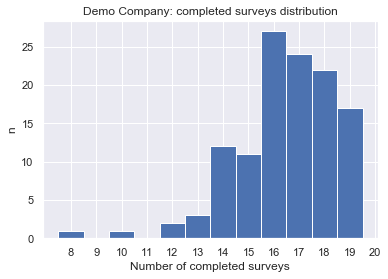

In [50]:
plot.plot_participation_completed_surveys(df_participants, root_node)

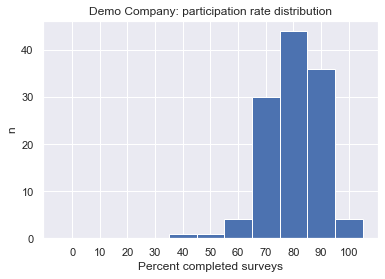

In [51]:
plot.plot_participation_completed_surveys_percent(df_participants, root_node)

## Participation by org units

For every org unit, the number of users and the participation rate, and the number of completed survey is listed.

In [52]:
display(df_surveys.head(3))

,userID,userIsDeleted,dateStart,dateCompleted,isComplete,mobileConnectionCount,orgNodeID,orgNodeLeft,orgNodeRight
userSurveyID,,,,,,,,,
1,1050,0,2019-12-01,2019-12-01,1,0,100,2,3
2,1089,0,2019-12-01,NaT,0,0,200,4,5
3,1076,0,2019-12-01,2019-12-01,1,0,200,4,5


In [53]:
df_node_participation = aggregator.get_node_participation(df_surveys, org_nodes)
display(df_node_participation)

,label,level,users_count,surveys_complete,surveys_incomplete,percent_complete
nodeID,,,,,,
1,Demo Company,1,120,1978,545,78
100,Switzerland,2,60,982,279,78
200,Germany,2,30,487,143,77
300,Austria,2,30,509,123,81


## Participation by device over time

In [54]:
display(df_surveys.head(3))

,userID,userIsDeleted,dateStart,dateCompleted,isComplete,mobileConnectionCount,orgNodeID,orgNodeLeft,orgNodeRight
userSurveyID,,,,,,,,,
1,1050,0,2019-12-01,2019-12-01,1,0,100,2,3
2,1089,0,2019-12-01,NaT,0,0,200,4,5
3,1076,0,2019-12-01,2019-12-01,1,0,200,4,5


In [55]:
df_participation = aggregator.get_participation_timelines(df_surveys, root_node)
display(df_participation.tail(3))

,period_start,surveyCount,completeCount,percentComplete,surveyCountByMail,completeCountByMail,percentCompleteByMail,surveyCountByMobile,completeCountByMobile,percentCompleteByMobile
period_end,,,,,,,,,,
2020-05-17,2020-04-17,440,350,79.55,440,350,79.55,0,0,NaN
2020-05-24,2020-04-24,437,354,81.01,437,354,81.01,0,0,NaN
2020-05-31,2020-05-01,442,364,82.35,442,364,82.35,0,0,NaN


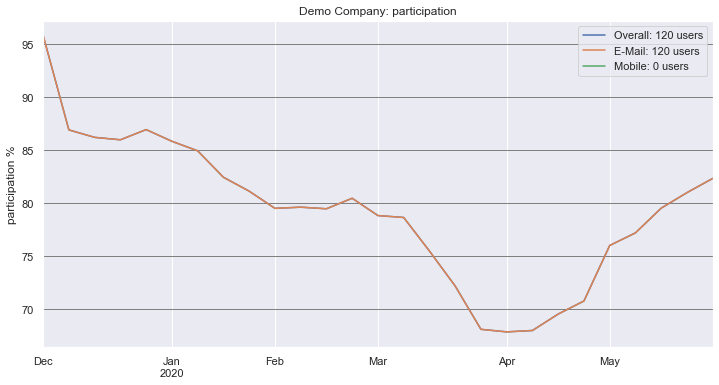

In [56]:
plot.plot_participation_by_device(df_participation, df_users, root_node)

We are not tracking the client (desktop vs mobile) while the users fill in the surveys. Therefore, we distinguish mobile from e-mail users by their established mobile connections. If users have a mobile connection, they receive push-messages rather than e-mails, so they probably use a mobile device to fill in the survey.

## Participation by org unit over time

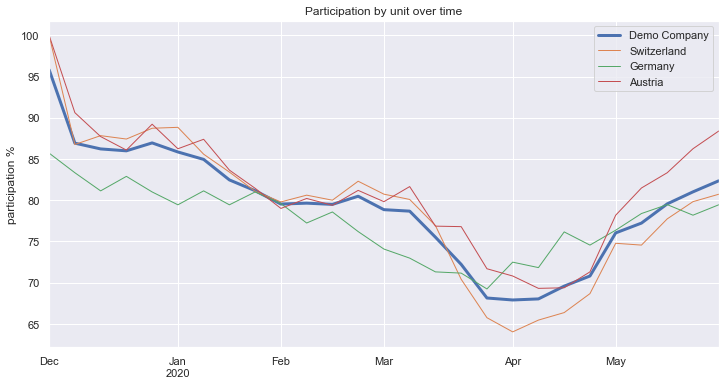

In [57]:
plot.plot_participation_by_node(df_surveys, org_nodes, root_node)

# KPI changes over time

This comparison shows *short term* differences compared to the mean KPI values over *all* time of the *whole* organization.
*One-sample* two-sided t-tests are performed to compare the mean KPI of the current period with the mean KPI of the whole organization.

- If there are less than 8 KPI values in a period, no datapoint is shown and the line contains a gap. 
- The background is colored according to the effect size (cohen's d), but only for statistically significant t-tests.
    - small effect: `d >= 0.2`
    - medium effect: `d >= 0.5`
    - large effect: `d >= 0.8`
- The datapoints are colored according to their z-score, which is almost equivalent to cohen's d for 
  (because the benchmark contains way more data and strongly dominates the pooled standard deviation).
    - green: `z > -0.5` (positive effects, no effects, small negative effect)
    - yellow: `z <= -0.5` (medium negative effect) 
    - red: `z <= -0.8` (large negative effect)
- The moving average time window is *right-aligned*, so recent datapoints are not influenced by new incoming data. 
   Every datapoint is an average KPI value of the past 30 days.
- The error bars show variance / 10 to indicate changes in spread of answers over time.

**Update 2019-12-13:** In order to reduce the number of charts to get a better overview, there is now only one chart per KPI, containing the
selected org nodes. Only yellow and red areas are marked, like in the Ligado cockpit. Statistical significance is not 
shown.

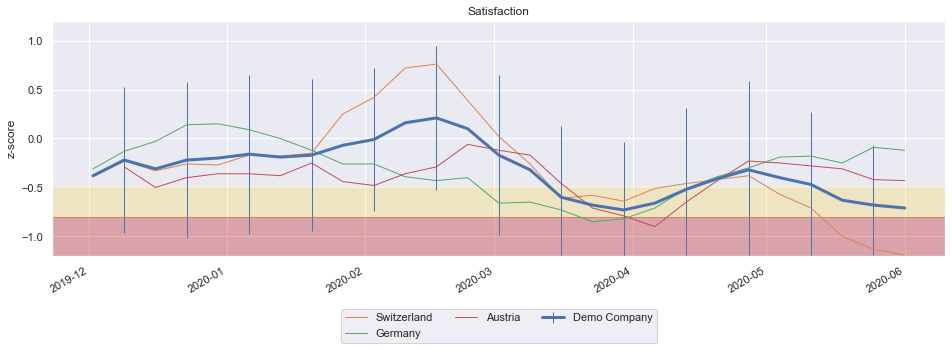

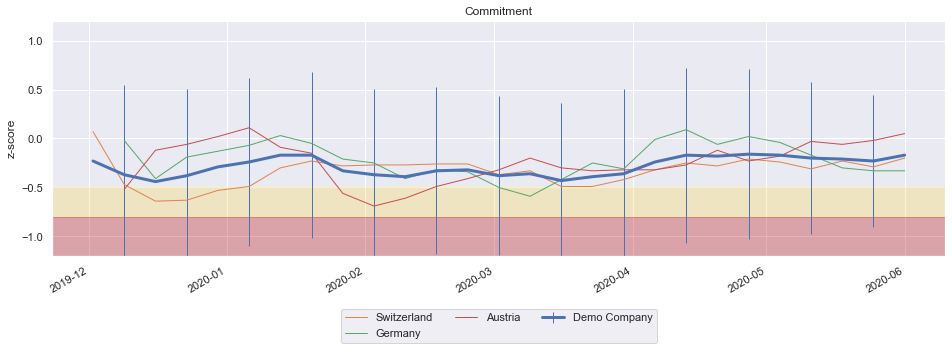

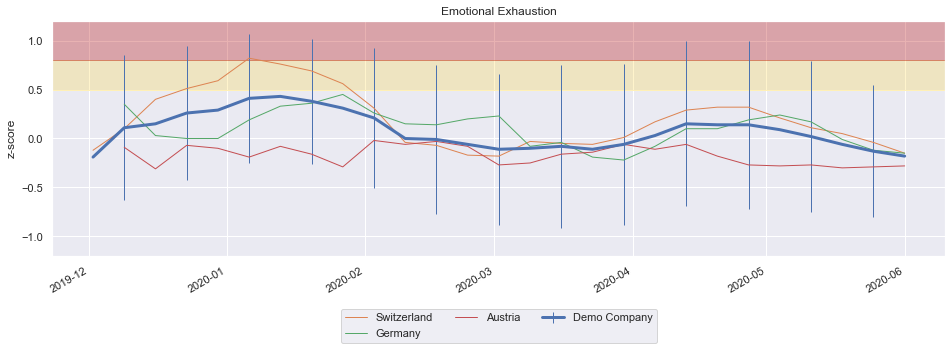

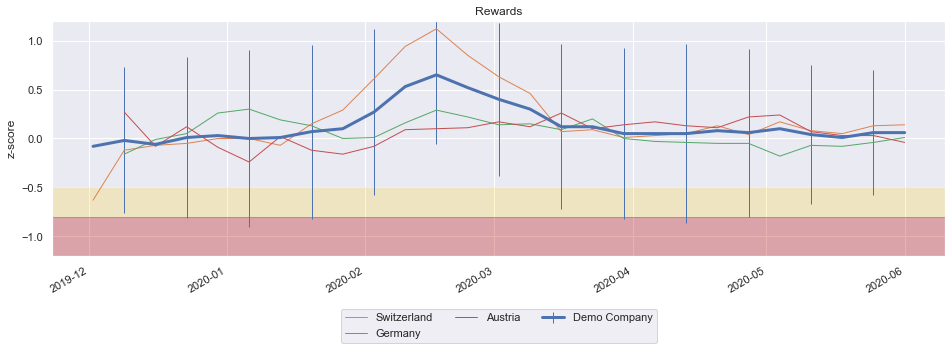

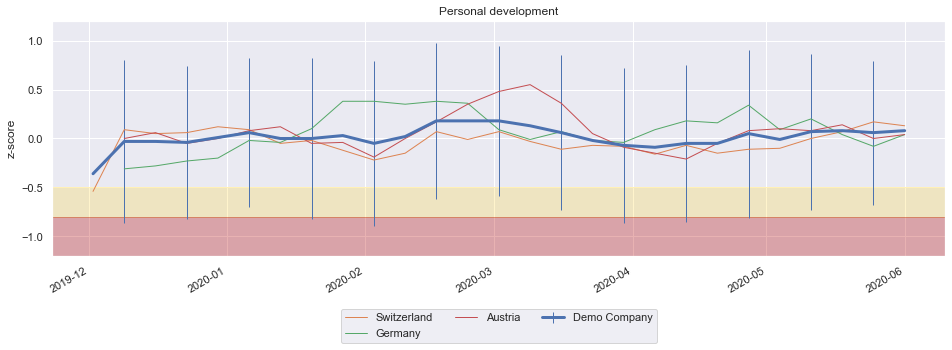

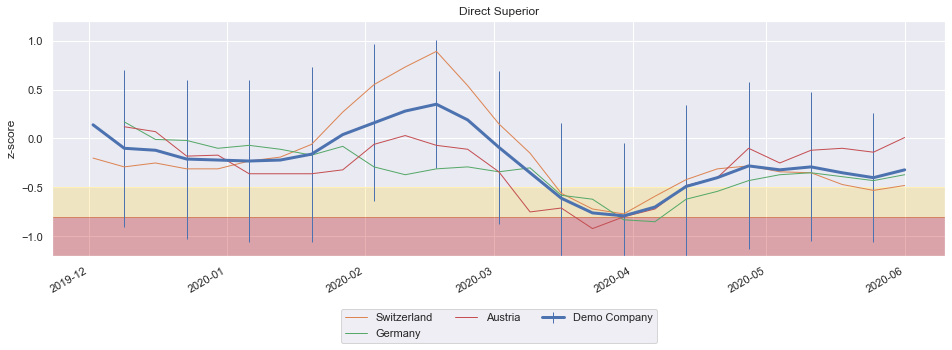

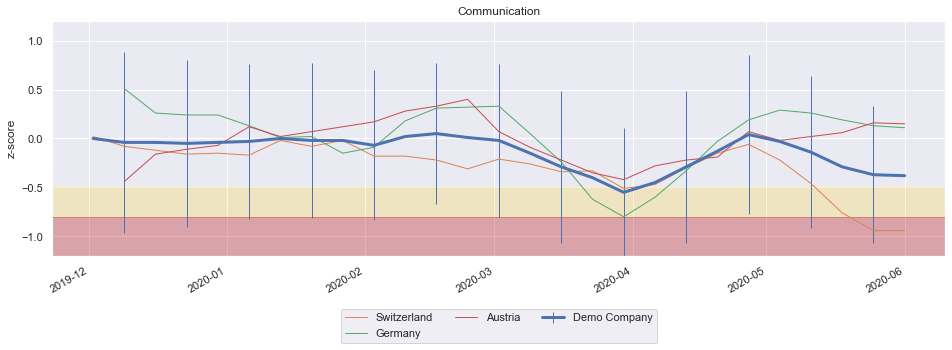

In [58]:
#for _, node in org_nodes.iterrows():
#    df_node = get_df_by_org_node(df_kpi_values, node)
#    for _, kpi in kpis.iterrows():
#        df_kpi_timeline = aggregator.get_kpi_timeline(df_node, df_benchmarks, kpi)
#        plot_kpi_timelines(node, df_kpi_timeline, kpi)

for _, kpi in kpis.iterrows():
    plot.plot_org_node_kpi_timelines(df_kpi_values, df_benchmarks, org_nodes, root_node, kpi)

# Answers per KPI over time

The following analysis shows the number of answers per KPI over time. This analysis can be used on _real survey data_, but also on _simulated survey data_ (generated with the surveylab virtual time feature) to see how many answers will be generated for which KPI in which org node. The amount of answers depends on
- the amount of participants in the org nodes
- the participation rate
- the survey sampling rate (amount of surveys per participant per time, defined in the event model)
- the item selection algorithm

This is very useful to tune the event model and the item selection algorithm, before data acquisition.


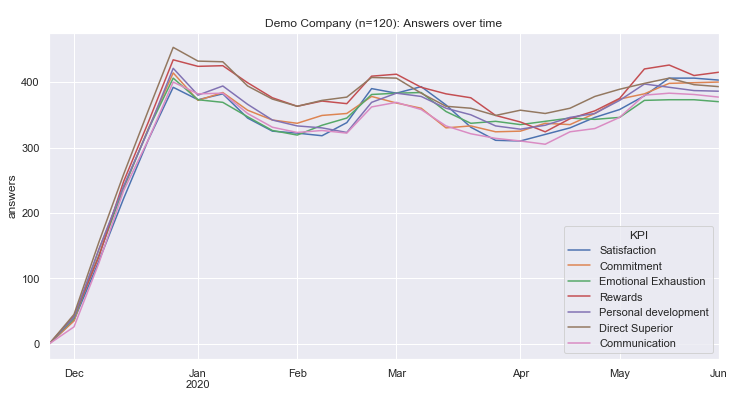

In [59]:
df_node = aggregator.filter_by_org_node(df_kpi_values, root_node)
plot.plot_answer_timelines(root_node, df_node, df_benchmarks, kpis)

# Smart Alerts

The list of smart alerts contains entries of time periods, when a given KPI was 
critically low. These are the criteria for smart alerts:
- At least 3 consecutive datapoints must be in yellow/red area (z-score <= 0.5). The number 
of critical consecutive datapoints is listed in the length column and corresponds to the number
of weeks.
- Datapoints must have at least 8 answers.
- The effect (deviation from benchmark) must be statistically significant on the 
p <= 0.05 level for each datapoint.

The following organization nodes are scanned using no filter and each category of 
the sex, age group, and employment duration filters:

In [60]:
org_nodes[['label', 'activeUsers']]

,label,activeUsers
nodeID,,
1,Demo Company,120
100,Switzerland,60
200,Germany,30
300,Austria,30


In [61]:
#df_kpi_values_slice = df_kpi_values.loc[df_kpi_values.index >= '2019-10-15']
#df_alerts = alert.get_alerts(df_kpi_values_slice, df_org_nodes.loc[[NODE_SCHWEIZ]], kpis, df_benchmarks)
df_alerts = alert.get_alerts(df_kpi_values, org_nodes, kpis, df_benchmarks)
df_alerts

,end,length,mean_answers,node_id,node_label,kpi,filter,url
start,,,,,,,,
2019-12-09,2019-12-23,3,85.3,1,Demo Company,Commitment,Sex: male,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...
2019-12-09,2020-01-06,5,54.6,100,Switzerland,Commitment,Sex: male,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...
2019-12-09,2020-01-20,7,45.9,100,Switzerland,Commitment,Employment duration: more than 3 years,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...
2019-12-09,2019-12-23,3,33.3,1,Demo Company,Satisfaction,Age group: more than 50 years,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...
2019-12-09,2019-12-23,3,15.0,100,Switzerland,Commitment,Age group: more than 50 years,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...
...,...,...,...,...,...,...,...,...
2020-05-18,2020-06-01,3,25.7,300,Austria,Satisfaction,Employment duration: 1 to 3 years,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...
2020-05-18,2020-06-01,3,21.7,100,Switzerland,Communication,Age group: less than 30 years,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...
2020-05-18,2020-06-01,3,46.3,100,Switzerland,Communication,Employment duration: 1 to 3 years,https://ligado-demo-ecaclfi-bftge3smv4qgi.eu-2...


# Export

This should be executed manually, when all charts are rendered. Otherwise, charts may be missing or 
outdated in the output.

In [62]:
# Passing variables to shell: https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html
!jupyter nbconvert --no-input --no-prompt {cfg.paths.project_dir}.ipynb


[NbConvertApp] Converting notebook ligado-demo.ipynb to html
[NbConvertApp] Writing 1010565 bytes to ligado-demo.html
